<a href="https://colab.research.google.com/github/Bolorooo24/Data-Science-Marathon/blob/main/Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we will use CNN to build train and test a traffic sign classification model. We will build this model using tf and keras. It is a multiclassification problem which can be used to make self-driving, smarter cars

In [1]:
# run this cell and the select the kaggle.json file download from the Kaggle account settings page.
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bolormaabanzragch","key":"c1e22c4a299a7f5737324d8de1534a1c"}'}

We starte by connecting to Kaggle using Kaggle API which can be downloaded from your kaggle account's settings and uploading it here(upload box)

In [2]:
# installing kaggle API client
!pip install -q kaggle

In [3]:
# the Kaggle API client expects this file to be in ~/.kaggle,  so move it here
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# this permission change avoids a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

Setted up the Kaggle using API

In [4]:
# creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


To store the data we created a new directory and make it current working directory.

In [5]:
# searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          90971       1011  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          11944        265  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            196         26  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [6]:
# downloading the dataset
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

 98% 598M/612M [00:05<00:00, 156MB/s]
100% 612M/612M [00:05<00:00, 108MB/s]
/content


After searched the datasets next step would be downloading the data into collab notebook using references found in search option.

In [7]:
# unzipping downloaded file and removing unusable files

!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset


Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [8]:
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip

!rm -rf traffic_sign_dataset/Meta

!rm -rf traffic_sign_dataset/meta

!rm -rf traffic_sign_dataset/test

!rm -rf traffic_sign_dataset/train

!rm traffic_sign_dataset/Meta.csv

We unziped dataset and removed unuseful files

In [9]:
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
from PIL import Image
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [10]:
import os

path = "traffic_sign_dataset/Train"
image_files = [f for f in sorted(os.listdir(path)) if os.path.isfile(os.path.join(path, f))]

print(image_files)  # Print the list of image files to debug


[]


In [11]:
%cd traffic_sign_dataset/Train

/content/traffic_sign_dataset/Train


In [12]:
!ls

0   11	14  17	2   22	25  28	30  33	36  39	41  6  9
1   12	15  18	20  23	26  29	31  34	37  4	42  7
10  13	16  19	21  24	27  3	32  35	38  40	5   8


In [15]:
import os
import shutil

# path to the directory Train
train_dir = "/content/traffic_sign_dataset/Train"

# creating new output directory
output_dir = "/content/traffic_sign_dataset/Train_images/"
os.makedirs(output_dir, exist_ok = True)

# iterating through subdir of the Train directory
for folder in os.listdir(train_dir):
  folder_path = os.path.join(train_dir, folder)
  if os.path.isdir(folder_path):
    for image in os.listdir(folder_path):
      if image.endswith(('.jpg', '.png')):
        image_path = os.path.join(folder_path, image)
        shutil.move(image_path, os.path.join(output_dir, image))

# removing empty directories
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        os.rmdir(folder_path)

print("subdirs removed and moved all image to the Train_image directory.")


subdirs removed and moved all image to the Train_image directory.


In [23]:
%cd /content/traffic_sign_dataset/


/content/traffic_sign_dataset


In [27]:
!rm -rf Train


In [28]:
!ls

Test  Test.csv	Train.csv  Train_images


In [29]:
old_name = "/content/traffic_sign_dataset/Train_images"
new_name = "/content/traffic_sign_dataset/Train"

os.rename(old_name, new_name)
print(f"Dir name changed '{old_name}' to '{new_name}'.")


Dir name changed '/content/traffic_sign_dataset/Train_images' to '/content/traffic_sign_dataset/Train'.


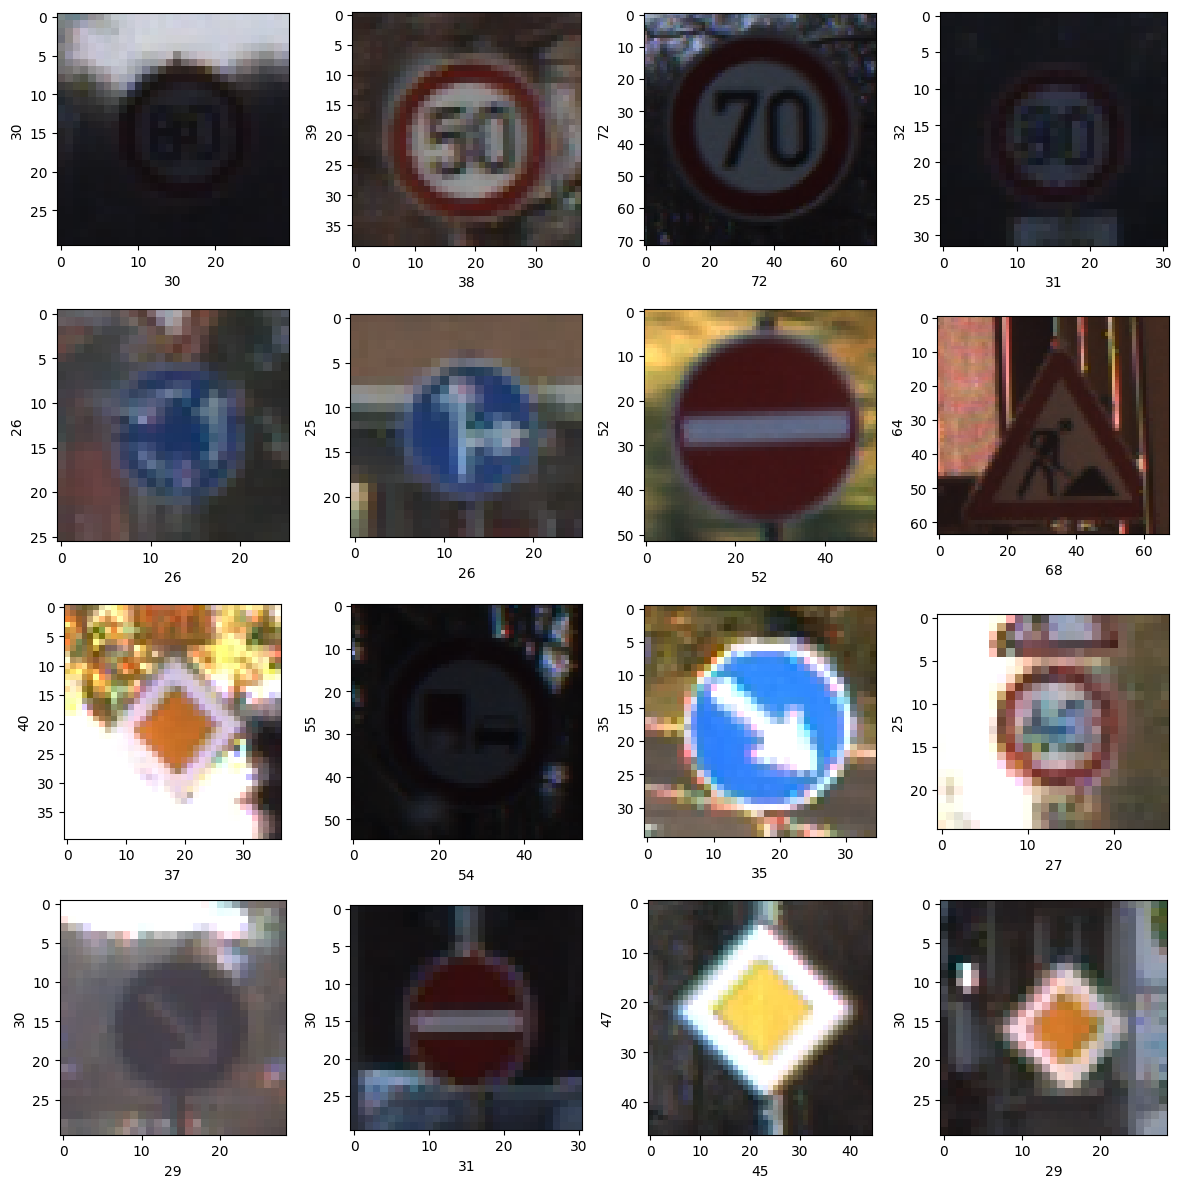

In [30]:
# plotting 12 images to check dataset
plt.figure(figsize=(12, 12))
path = "/content/traffic_sign_dataset/Train"
image_files = [f for f in sorted(os.listdir(path)) if os.path.isfile(os.path.join(path, f))]

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(os.path.join(path, random.choice(image_files)))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)
    plt.ylabel(rand_img.shape[0], fontsize=10)

plt.show()

In [32]:
# size of images are diffeent so we have to make them same size to do that we will take the mean of dimentions
dim1 = []
dim2 = []

train_dir = '/content/traffic_sign_dataset/Train'

# listing all image files in the "Train" directory
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

for image_file in image_files:
    img = imread(os.path.join(train_dir, image_file))
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [33]:
print("Dimension 1 mean: ", np.mean(dim1), "Dimension 2 mean", np.mean(dim2))

Dimension 1 mean:  50.328929582493814 Dimension 2 mean 50.83587951745773


Now we will find out the mean value of both the dimensions and analyse them. here, we can see that (50,50) is the average shape for all the images.

In [35]:
# now we will reshape the images to (50,50)
images = []
label_id = []

train_dir = '/content/traffic_sign_dataset/Train'


for image_file in os.listdir(train_dir):
    image_path = os.path.join(train_dir, image_file)
    img = Image.open(image_path)
    img = img.resize((50, 50))
    img = np.array(img)
    images.append(img)
    label_id.append(int(image_file.split('.')[0]))

In [36]:
# converting images into numpy array
images = np.array(images)

# pixel value of each image ranges between 0 to 255
# dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization
images = images/255

Now we converted all the images into numpy array and normalized them. Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

In [37]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [43]:
images.shape

(39209, 50, 50, 3)

In [44]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

0               1
180003100012    1
180003100005    1
180003100006    1
180003100007    1
dtype: int64

,Label ID,Count
0,260001400011,1
1,70000800009,1
2,330002200007,1
3,10002400005,1
4,400000700020,1


In [46]:
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)